Imports

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

plt.style.use('seaborn')

C:\Users\cliff\AppData\Local\Temp\ipykernel_36988\2468248190.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Load and Organize Blood Data

In [2]:
df = pd.read_csv("Blood_2023-11-11T1110.csv")
# print(df)
##  Shorten col names
df.rename(columns = {'Blood Draw Data Total Protein (g/dL)':'Protein'}, inplace = True)
df.rename(columns = {'Blood Draw Data Appointment Date':'Date'}, inplace = True)
df.rename(columns = {'Blood Draw Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'Blood Draw Data A/G Ratio':'A/G Ratio'}, inplace = True)
df = df[['ID', 'Date', 'Protein', 'A/G Ratio']]
df= df.sort_values(by=['ID'], ascending=True)
df['Date'] =pd.to_datetime(df['Date'])  ## convert date object to datetime
print(df)
print(df.dtypes) ## Show data types

         ID       Date  Protein  A/G Ratio
431    65.0 2020-08-31      6.2        2.0
51     65.0 2023-09-06      6.1        2.1
238    65.0 2022-06-29      6.2        2.3
359    65.0 2021-07-19      6.9        1.9
189    65.0 2022-10-26      6.5        2.1
..      ...        ...      ...        ...
34   2074.0 2023-09-19      NaN        NaN
28   2078.0 2023-09-27      NaN        NaN
33   2080.0 2023-09-19      NaN        NaN
1    2084.0 2023-10-26      NaN        NaN
539     NaN        NaT      NaN        NaN

[540 rows x 4 columns]
ID                  float64
Date         datetime64[ns]
Protein             float64
A/G Ratio           float64
dtype: object


Exclude questionable data

In [3]:
pd.to_numeric(df['Protein'], errors = 'coerce').replace(np.nan, 0)  ## some data is text or NaN other is numeric

df1 = df[df.Protein.lt(6)] ## View all protein values less than 6
print(df1)
df2 = df[df.Protein.gt(10)]  ## View all protein values greater than 10
print(df2)
df3 = df[df['A/G Ratio'].gt(2.5)]  ##  Same for A/G ratios
print(df3)
df4 = df[df['A/G Ratio'].lt(0.5)]
print(df4)

         ID       Date  Protein  A/G Ratio
520  1383.0 2019-09-17      5.4        1.7
423  1478.0 2020-10-08      5.8        2.2
159  1715.0 2022-12-14      5.9        1.8
381  1730.0 2021-05-14      5.8        2.4
313  1740.0 2021-10-21      5.9        1.8
91   1741.0 2023-06-15      5.7        2.0
78   1867.0 2023-07-13      5.8        1.4
56   1975.0 2023-08-17      5.9        2.1
         ID       Date  Protein  A/G Ratio
182  1389.0 2022-11-11     68.0        1.7
234  1422.0 2022-07-11     71.0        1.3
331  1789.0 2021-09-20    734.0        1.5
233  1796.0 2022-07-12     68.0        1.6
181  1927.0 2022-11-16     76.0        1.8
136  1944.0 2023-03-22     69.0        1.8
83   1957.0 2023-07-10     71.0        1.8
119  1961.0 2023-05-01     67.0        1.2
41   2057.0 2023-09-13     66.0        1.9
         ID       Date  Protein  A/G Ratio
43    571.0 2023-09-13      7.1       16.0
173  1937.0 2022-11-30      7.1       16.0
118  1974.0 2023-05-02      7.6       16.0
45   1983.0

Exclude Protein values >= 10 and A/G Ratios > 2.5

In [4]:
df = df[df.Protein.lt(10)] 
df = df[df['A/G Ratio'].lt(2.5)]
print(df)

         ID       Date  Protein  A/G Ratio
431    65.0 2020-08-31      6.2        2.0
51     65.0 2023-09-06      6.1        2.1
238    65.0 2022-06-29      6.2        2.3
359    65.0 2021-07-19      6.9        1.9
189    65.0 2022-10-26      6.5        2.1
..      ...        ...      ...        ...
38   2039.0 2023-09-14      7.8        1.2
64   2043.0 2023-08-09      6.8        1.7
67   2049.0 2023-08-08      6.5        1.7
62   2052.0 2023-08-10      6.8        1.7
39   2060.0 2023-09-14      7.0        1.5

[407 rows x 4 columns]


Group data by participant ID and get grouped stats

In [5]:
result = df.groupby('ID').agg({'Protein': ['count', 'mean', 'min', 'max']}) 
  
print("Count, mean, min, and max values of Protein by ID") 
print(result)

result1 = df.groupby('ID').agg({'A/G Ratio': ['count', 'mean', 'min', 'max']}) 
  
print("Count, mean, min, and max values of Protein by ID") 
print(result1)

Count, mean, min, and max values of Protein by ID
       Protein                    
         count      mean  min  max
ID                                
65.0         7  6.428571  6.1  6.9
135.0        5  6.980000  6.7  7.2
150.0        6  7.066667  6.7  7.6
225.0        2  6.650000  6.5  6.8
388.0        1  6.300000  6.3  6.3
...        ...       ...  ...  ...
2039.0       1  7.800000  7.8  7.8
2043.0       1  6.800000  6.8  6.8
2049.0       1  6.500000  6.5  6.5
2052.0       1  6.800000  6.8  6.8
2060.0       1  7.000000  7.0  7.0

[176 rows x 4 columns]
Count, mean, min, and max values of Protein by ID
       A/G Ratio                    
           count      mean  min  max
ID                                  
65.0           7  2.014286  1.8  2.3
135.0          5  1.580000  1.5  1.6
150.0          6  1.716667  1.6  1.8
225.0          2  2.100000  2.1  2.1
388.0          1  1.500000  1.5  1.5
...          ...       ...  ...  ...
2039.0         1  1.200000  1.2  1.2
2043.0         1

Plot protein data

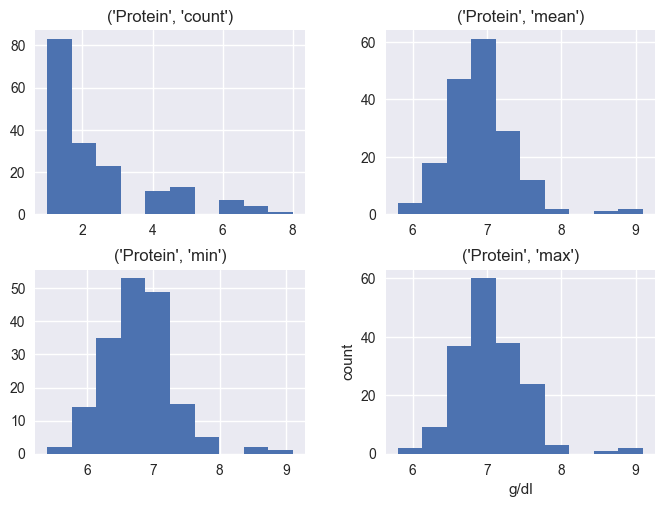

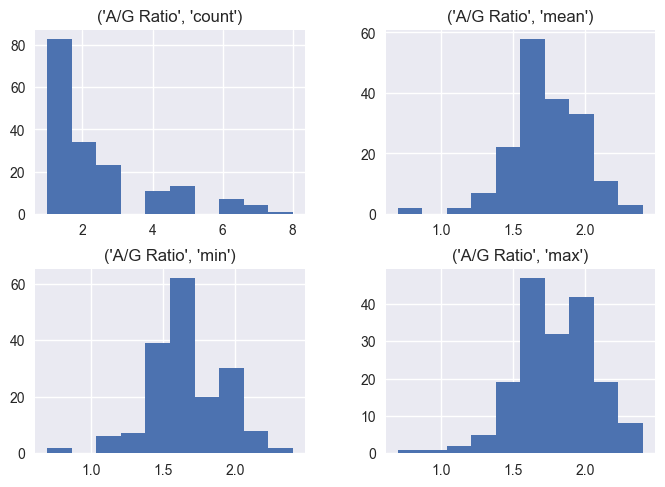

In [11]:
result.hist()  ##Protein values
plt.xlabel("g/dl")
plt.ylabel("count")
plt.show()

result1.hist()  ## A/G ratios
plt.show()
# plt.savefig("protein.jpg")  ## Use VSCode to save as png

Sort data in time series and plot trends

         ID       Date  Protein  A/G Ratio
431    65.0 2020-08-31      6.2        2.0
359    65.0 2021-07-19      6.9        1.9
307    65.0 2021-11-02      6.4        1.9
238    65.0 2022-06-29      6.2        2.3
189    65.0 2022-10-26      6.5        2.1
..      ...        ...      ...        ...
236  1805.0 2022-06-29      6.6        2.0
192  1805.0 2022-10-13      6.5        1.8
142  1805.0 2023-02-22      7.1        1.7
101  1805.0 2023-05-31      6.7        1.5
49   1805.0 2023-09-07      6.5        1.8

[78 rows x 4 columns]


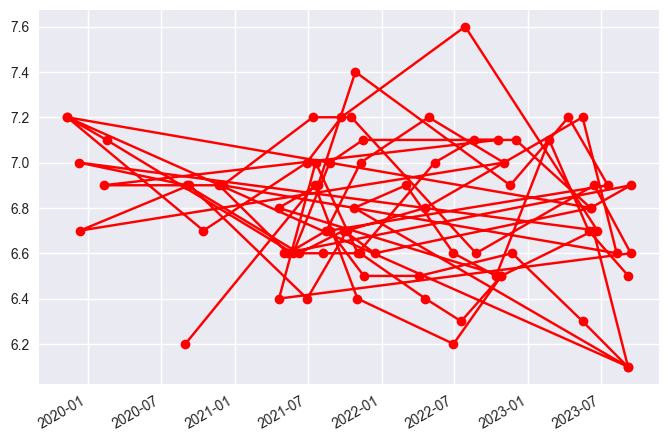

In [7]:
df = df.sort_values(by=['ID','Date'], ascending=True) ##  Sort by ID then Date
df = df.groupby('ID').filter(lambda x : len(x)>5)  # Reduce data to IDs with six or more blood draws
print(df)
plt.plot_date(df['Date'], df['Protein'], color = 'red',linestyle = 'solid')
plt.gcf().autofmt_xdate()

Plot each ID in a separate trend line 

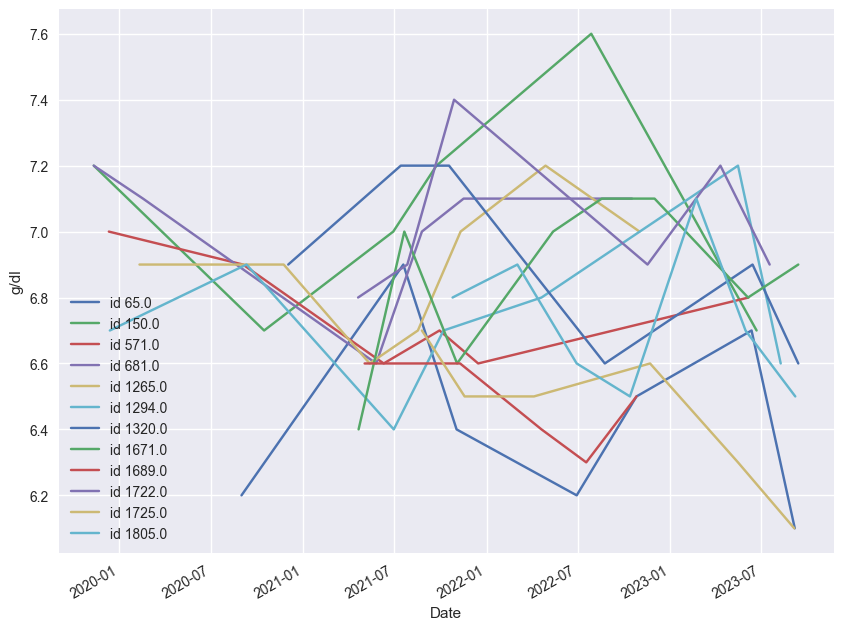

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

for n, g in df.groupby('ID'):
    g.plot(
        x="Date", y="Protein",
        xlabel="Date", ylabel="g/dl",
        label=f"id {n}",
        ax=ax,
)

plt.show();

Subplot each participant's trend - Protein Level

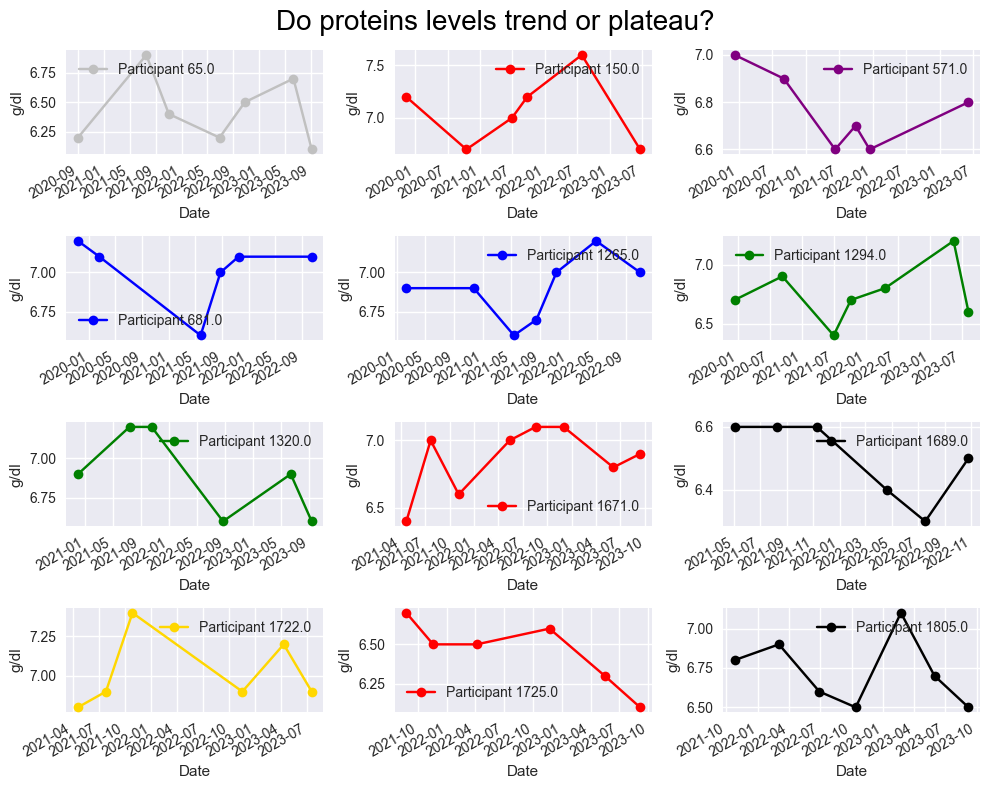

In [9]:
import random
fig, axs = plt.subplots(figsize=(10, 8), nrows=4, ncols=3)
c = ['purple', 'red', 'green', 'blue', 'black', 'brown', 'gold', 'silver', 'aqua']
for (n, g), ax in zip(df.groupby("ID"), axs.flatten()):
    g.plot(
        x="Date", y="Protein", marker='o',
        xlabel="Date", ylabel="g/dl",
        label=f"Participant {n}",
        color=c[random.randint(0, 8)],
        ax=ax,
    )
fig.suptitle('Do proteins levels trend or plateau?', fontsize = 20, color = 'black')
plt.tight_layout()
plt.show()

Subplot each participant's trend - A/G Ratio

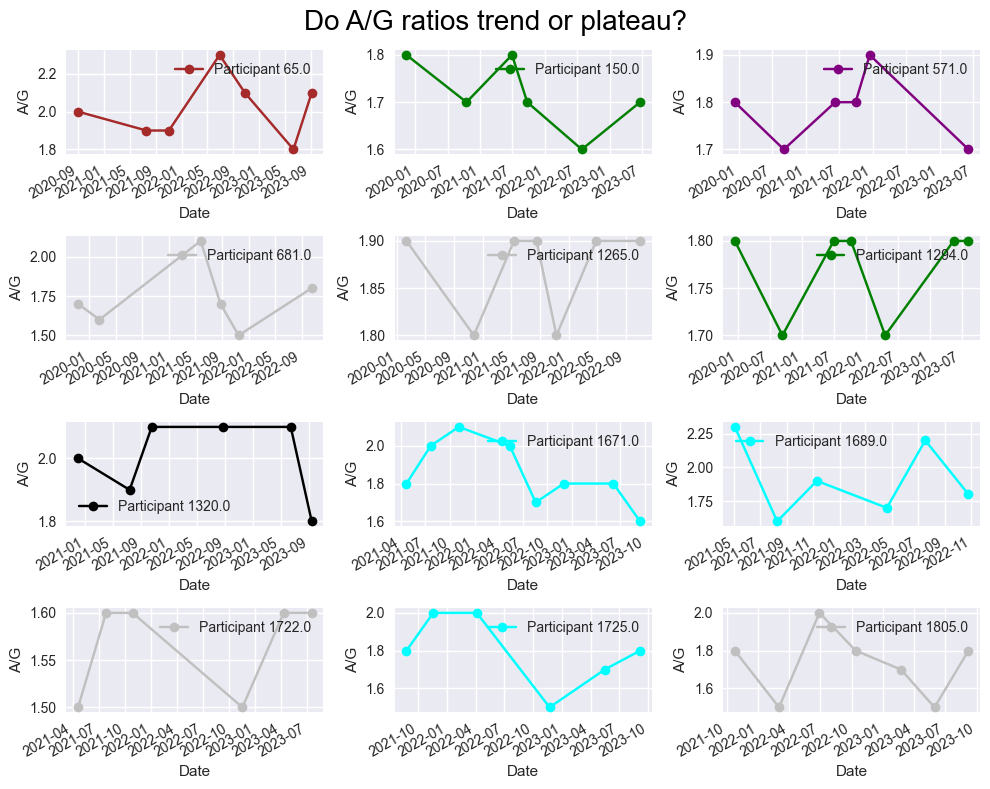

In [10]:
fig, axs = plt.subplots(figsize=(10, 8), nrows=4, ncols=3)
c = ['purple', 'red', 'green', 'blue', 'black', 'brown', 'gold', 'silver', 'aqua']
for (n, g), ax in zip(df.groupby("ID"), axs.flatten()):
    g.plot(
        x="Date", y="A/G Ratio", marker='o',
        xlabel="Date", ylabel="A/G",
        label=f"Participant {n}",
        color=c[random.randint(0, 8)],
        ax=ax,
    )
fig.suptitle('Do A/G ratios trend or plateau?', fontsize = 20, color = 'black')
plt.tight_layout()
plt.show()